<a href="https://colab.research.google.com/github/ariahosseini/DeepML/blob/main/001_TensorFlow_Proj_One_FFNN_RandomSamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# util
import itertools
import numpy as np
import os.path
from random import randint
# sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import (Sequential, load_model)
from tensorflow.keras.layers import (Dense, Activation)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import (CategoricalCrossentropy, SparseCategoricalCrossentropy)
# matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Set GPU
physical_devices = tf.config.experimental.list_physical_devices(device_type='GPU')
print("No. GPUs available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(device=physical_devices[0], enable=True)

No. GPUs available:  1


In [ ]:
# Generate a sample
train_labels = []
train_samples = []

for i in range(50): # outliers

  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000): # inliners

  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
# Generate a test case
test_labels = []
test_samples = []

for i in range(10): # outliers

  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200): # inliners

  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

Text(0, 0.5, 'Categoty')

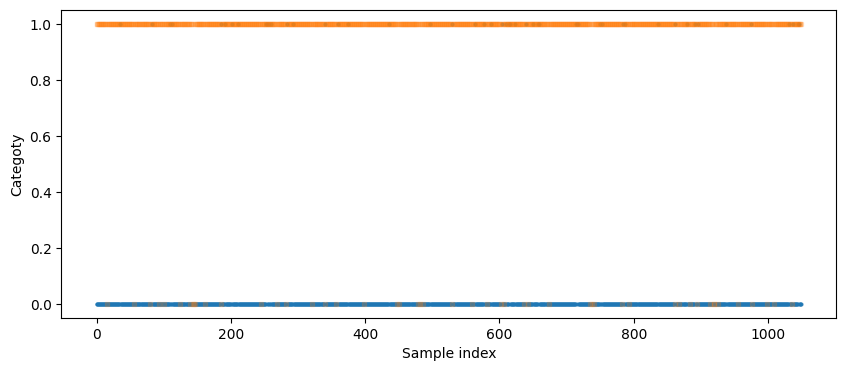

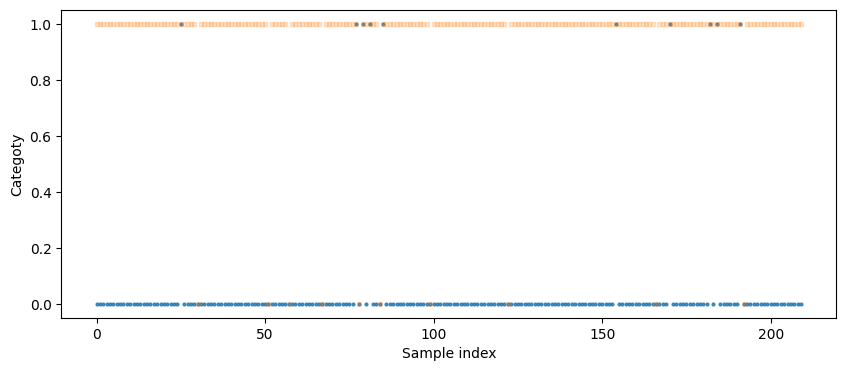

In [ ]:
# Convert to np.array
# train
train_labels = np.asarray(train_labels)
train_samples = np.asarray(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)
# test
test_labels = np.asarray(test_labels)
test_samples = np.asarray(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
# plot
plt.figure(figsize=(10,4))
plt.plot(train_labels[train_samples<65], 'o', markersize=2, alpha=.8)
plt.plot(train_labels[train_samples>=65], 's', markersize=3, alpha=.2)
plt.xlabel("Sample index")
plt.ylabel("Categoty")

plt.figure(figsize=(10,4))
plt.plot(test_labels[test_samples<65], 'o', markersize=2, alpha=.8)
plt.plot(test_labels[test_samples>=65], 's', markersize=3, alpha=.2)
plt.xlabel("Sample index")
plt.ylabel("Categoty")

In [ ]:
# Scaled data
scaler = MinMaxScaler(feature_range=(0,1))
# train
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
# test
scaled_test_samples = scaler.transform(test_samples.reshape(-1,1))

In [ ]:
# Model
model = Sequential(
    [
        Dense(units=16, input_shape=(1,), activation="relu"),
        Dense(units=32, activation="relu"),
        Dense(units=2, activation="softmax")

    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Fit
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
210/210 - 7s - loss: 0.6643 - accuracy: 0.5600 - 7s/epoch - 31ms/step
Epoch 2/10
210/210 - 1s - loss: 0.6282 - accuracy: 0.6810 - 689ms/epoch - 3ms/step
Epoch 3/10
210/210 - 1s - loss: 0.5912 - accuracy: 0.7229 - 794ms/epoch - 4ms/step
Epoch 4/10
210/210 - 1s - loss: 0.5564 - accuracy: 0.7600 - 1s/epoch - 6ms/step
Epoch 5/10
210/210 - 1s - loss: 0.5217 - accuracy: 0.7929 - 672ms/epoch - 3ms/step
Epoch 6/10
210/210 - 1s - loss: 0.4872 - accuracy: 0.8305 - 581ms/epoch - 3ms/step
Epoch 7/10
210/210 - 1s - loss: 0.4540 - accuracy: 0.8557 - 779ms/epoch - 4ms/step
Epoch 8/10
210/210 - 1s - loss: 0.4228 - accuracy: 0.8771 - 769ms/epoch - 4ms/step
Epoch 9/10
210/210 - 0s - loss: 0.3944 - accuracy: 0.8900 - 472ms/epoch - 2ms/step
Epoch 10/10
210/210 - 0s - loss: 0.3701 - accuracy: 0.9062 - 464ms/epoch - 2ms/step


In [ ]:
# Fit and validate
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1,
          batch_size=10, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
189/189 - 1s - loss: 0.2732 - accuracy: 0.9344 - val_loss: 0.2615 - val_accuracy: 0.9286 - 728ms/epoch - 4ms/step
Epoch 2/10
189/189 - 1s - loss: 0.2704 - accuracy: 0.9370 - val_loss: 0.2588 - val_accuracy: 0.9286 - 503ms/epoch - 3ms/step
Epoch 3/10
189/189 - 0s - loss: 0.2681 - accuracy: 0.9376 - val_loss: 0.2567 - val_accuracy: 0.9286 - 460ms/epoch - 2ms/step
Epoch 4/10
189/189 - 0s - loss: 0.2662 - accuracy: 0.9392 - val_loss: 0.2549 - val_accuracy: 0.9381 - 450ms/epoch - 2ms/step
Epoch 5/10
189/189 - 1s - loss: 0.2642 - accuracy: 0.9429 - val_loss: 0.2528 - val_accuracy: 0.9286 - 504ms/epoch - 3ms/step
Epoch 6/10
189/189 - 0s - loss: 0.2628 - accuracy: 0.9402 - val_loss: 0.2513 - val_accuracy: 0.9286 - 465ms/epoch - 2ms/step
Epoch 7/10
189/189 - 0s - loss: 0.2611 - accuracy: 0.9413 - val_loss: 0.2501 - val_accuracy: 0.9286 - 484ms/epoch - 3ms/step
Epoch 8/10
189/189 - 0s - loss: 0.2596 - accuracy: 0.9402 - val_loss: 0.2488 - val_accuracy: 0.9286 - 483ms/epoch - 3ms/step


In [ ]:
# Predictions
pred = model.predict(x=scaled_test_samples, batch_size=100, verbose=2)
pred = np.argmax(pred, axis=-1)

5/5 - 0s - 126ms/epoch - 25ms/step


Confusion matrix no normalization
[[196  14]
 [ 10 200]]


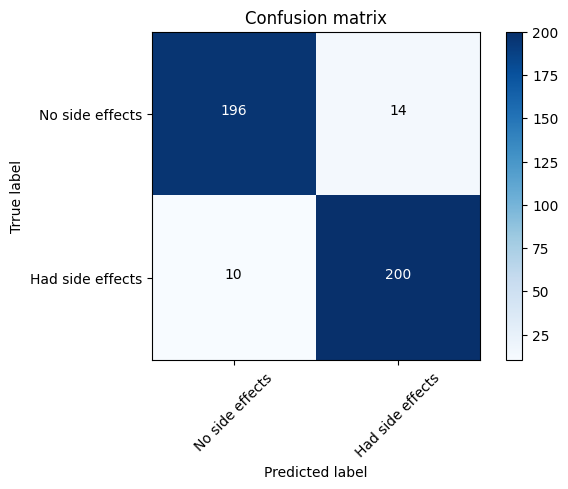

In [ ]:
# Confusion matrix
def plot_conf_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix no normalization")
  print(cm)
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

cm = confusion_matrix(y_true = test_labels, y_pred = pred)
cm_plot_labels = ["No side effects", "Had side effects"]
plot_conf_matrix(cm=cm, classes=cm_plot_labels)

In [ ]:
# Save
# if os.path.isfile("model.h5") is False:
#   model.save("model.h5") # use model = load_model("model.h5") for loading the model